# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Proyecto Integrador**

### **Tecnológico de Monterrey**

### **Prof. Dra. Grettel Barceló Alonso**

### EQUIPO 20

- ### OSCAR MAURICIO BECERRA ALEGRÍA | A01795611

- ### VÍCTOR DANIEL BOHÓRQUEZ TORIBIO | A01794554

- ### ALAN JASSO ARENAS | A01383272



## **Modelos alternativos de Machine Learning - Predicciones por Entidad**
### **Proyecto de análisis y pronóstico epidemiológico de enfermedades neurológicas y trastornos mentales en México, con énfasis en la enfermedad de Parkinson (EP) durante 2014–2024**

In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import plot_importance
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
# Leemos los datos
df = pd.read_csv('dataset_ml_estados_wo.csv')

# Dividimos en X y Y

X = df.drop('Nuevos_Casos', axis=1)
y = df['Nuevos_Casos']


In [3]:
# Separamos nuestros datos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

## Resumen de las variables - Modelos sin Entidades y sin Semanas

Se añade un resumen de las variables / características que se usarán para los modelos que no toman importancia de las entidades codificadas con OneHot. Después de entrenar y ver la importancia de las variables algunos modelos no toman importancia de esta varaible.

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18336 entries, 0 to 18335
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         18336 non-null  int64  
 1   Poblacion   18336 non-null  int64  
 2   Tasa_100k   18336 non-null  float64
 3   Semana_sin  18336 non-null  float64
 4   Semana_cos  18336 non-null  float64
 5   MM_Mensual  18336 non-null  float64
 6   MM_Cuarto   18336 non-null  float64
 7   MM_Anual    18336 non-null  float64
 8   lag_1       18335 non-null  float64
 9   lag_2       18334 non-null  float64
 10  lag_3       18333 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.5 MB


In [5]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,18336.0,2.018995e+03,3.158218e+00,2014.000000,2.016000e+03,2.019000e+03,2.022000e+03,2.024000e+03
Poblacion,18336.0,3.946718e+06,3.239569e+06,706361.000000,1.826835e+06,3.049044e+06,5.008364e+06,1.756043e+07
Tasa_100k,18336.0,1.256994e-01,1.438639e-01,0.000000,3.580000e-02,8.610000e-02,1.664000e-01,1.842200e+00
Semana_sin,18336.0,-2.064104e-04,7.132526e-01,-0.999561,-6.965510e-01,-2.449294e-16,6.965510e-01,9.995608e-01
Semana_cos,18336.0,-1.743976e-02,7.007289e-01,-0.998244,-7.175073e-01,2.963333e-02,6.749830e-01,1.000000e+00
MM_Mensual,18336.0,4.255781e+00,4.369231e+00,0.000000,1.500000e+00,3.000000e+00,5.500000e+00,5.475000e+01
MM_Cuarto,18336.0,4.255778e+00,4.165617e+00,0.000000,1.500000e+00,3.000000e+00,5.416667e+00,4.641667e+01
MM_Anual,18336.0,4.255785e+00,3.859547e+00,0.134615,1.673077e+00,3.134615e+00,5.307692e+00,3.426923e+01
lag_1,18335.0,4.256013e+00,4.893835e+00,0.000000,1.000000e+00,3.000000e+00,6.000000e+00,7.800000e+01
lag_2,18334.0,4.256191e+00,4.893909e+00,0.000000,1.000000e+00,3.000000e+00,6.000000e+00,7.800000e+01


## Resumen de Variables - Modelos con Estados y Semanas

En el caso de XGBoost y LightGBM, la codificación de las entidades con One Hot, algunas sí representaron una importancia, y al eliminar estas variables el modelo se vio afectado en el error relativo, no aparenta ser mucho, sin embargo como buscamos tener buenas propuetas para los modelos, consideramos importante presentar la mejor versión que pudimos entrenar de cada modelo, por ello este modelo si utilizará el dataset con las características de las entidades.

In [6]:
# Leemos los datos para XGB
df = pd.read_csv('dataset_ml_estados_w.csv')

# Dividimos en X y Y

X_w = df.drop('Nuevos_Casos', axis=1)
y_w = df['Nuevos_Casos']

In [7]:
# Separamos nuestros datos de entrenamiento y validación
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_w, y_w, test_size=0.20, random_state=42)

In [8]:
X_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18336 entries, 0 to 18335
Data columns (total 96 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Año                          18336 non-null  int64  
 1   Poblacion                    18336 non-null  int64  
 2   Tasa_100k                    18336 non-null  float64
 3   Semana_sin                   18336 non-null  float64
 4   Semana_cos                   18336 non-null  float64
 5   MM_Mensual                   18336 non-null  float64
 6   MM_Cuarto                    18336 non-null  float64
 7   MM_Anual                     18336 non-null  float64
 8   lag_1                        18335 non-null  float64
 9   lag_2                        18334 non-null  float64
 10  lag_3                        18333 non-null  float64
 11  Entidad_Aguascalientes       18336 non-null  float64
 12  Entidad_Baja California      18336 non-null  float64
 13  Entidad_Baja Cal

In [9]:
X_w.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,18336.0,2.018995e+03,3.158218e+00,2014.000000,2.016000e+03,2.019000e+03,2.022000e+03,2.024000e+03
Poblacion,18336.0,3.946718e+06,3.239569e+06,706361.000000,1.826835e+06,3.049044e+06,5.008364e+06,1.756043e+07
Tasa_100k,18336.0,1.256994e-01,1.438639e-01,0.000000,3.580000e-02,8.610000e-02,1.664000e-01,1.842200e+00
Semana_sin,18336.0,-2.064104e-04,7.132526e-01,-0.999561,-6.965510e-01,-2.449294e-16,6.965510e-01,9.995608e-01
Semana_cos,18336.0,-1.743976e-02,7.007289e-01,-0.998244,-7.175073e-01,2.963333e-02,6.749830e-01,1.000000e+00
...,...,...,...,...,...,...,...,...
Semana_49,18336.0,1.919721e-02,1.372214e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Semana_50,18336.0,1.919721e-02,1.372214e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Semana_51,18336.0,1.919721e-02,1.372214e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Semana_52,18336.0,1.919721e-02,1.372214e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


## Definimos nuestra función para calcular la métrica sMAPE

In [10]:
def sMAPE(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast))*100)

## Definimos nuestra función para calcular la métrica MASE

In [11]:
def MASE(train, actual, forecast):
    n = train.shape[0]
    d = np.abs(np.diff(train)).sum()/(n-1)
    errors = np.abs(actual - forecast)
    return errors.mean()/d

## Definimos la función para calcular el error relativo

In [12]:
def relative(mae, y_avg):
    rel = (mae / y_avg) * 100
    return rel

# Random Forest

In [13]:
# Entrenamos nuestro modelo de regresión
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, criterion='poisson', random_state=42, n_jobs=-1, min_samples_leaf=8)
t0 = time.perf_counter()
rf_model.fit(X_train, y_train)
t_fit = time.perf_counter() - t0

## Métricas del modelo

In [14]:
y_pred = rf_model.predict(X_test)
# Metricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
smape = sMAPE(y_test, y_pred)
mase = MASE(y_train, y_test, y_pred)
y_avg = y_test.mean()
relative_error = relative(mae, y_avg)
print("Relative Error Percentage: ", relative_error, " %")
print("Mean Absolute Error (MAE): ", mae)
print("Symetric Mean Absolute Percentage Error (sMAPE): ", smape, " %")
print("Mean Absolute Scaled Error (MASE): ", mase)
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R²): ", r_squared)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Training time: ", t_fit)

Relative Error Percentage:  2.875725703252623  %
Mean Absolute Error (MAE):  0.12248490365843982
Symetric Mean Absolute Percentage Error (sMAPE):  32.524258149354274  %
Mean Absolute Scaled Error (MASE):  0.02641308655382396
Mean Squared Error (MSE):  0.568711426524068
R-squared (R²):  0.9771924559400074
Root Mean Squared Error (RMSE):  0.7541295820507693
Training time:  1.0256748999963747


## Importancia del modelo

In [15]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

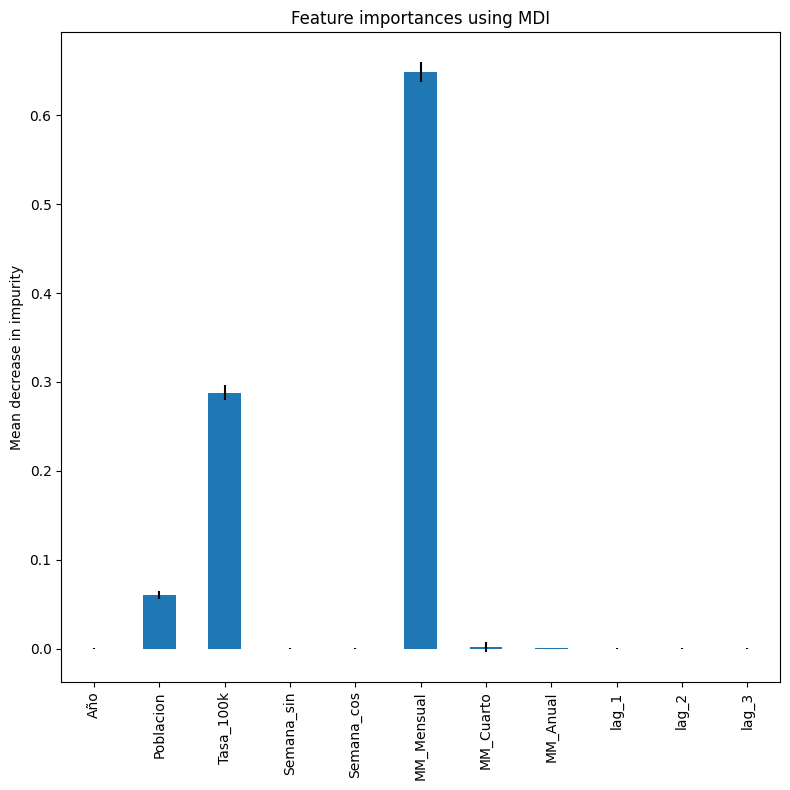

In [16]:
forest_importances = pd.Series(importances, index=list(X.columns))

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Ajuste del modelo

In [17]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1,1.0,10))

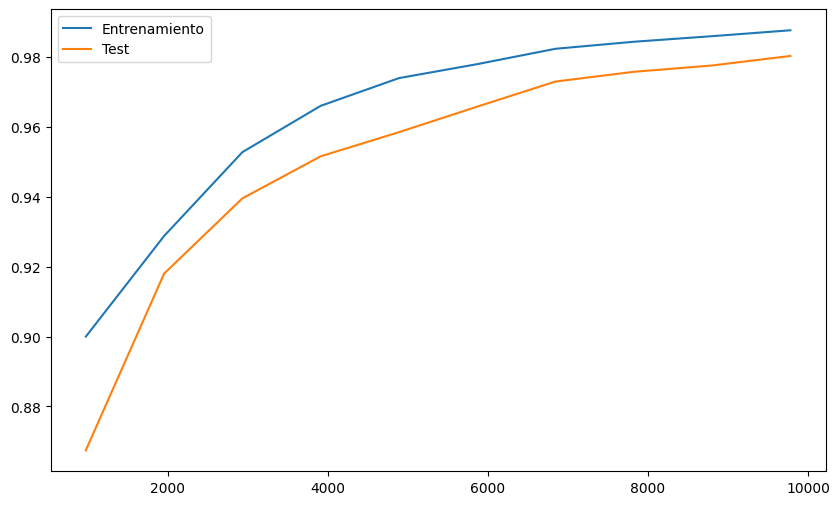

In [18]:
plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Entrenamiento")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test")
plt.legend()
plt.show()

## Comparación de resultados

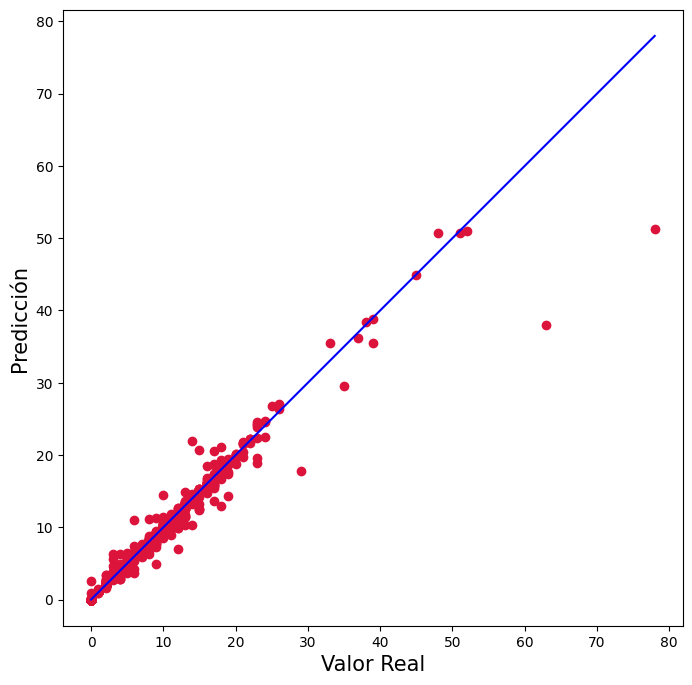

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Valor Real', fontsize=15)
plt.ylabel('Predicción', fontsize=15)
plt.axis('equal')
plt.show()

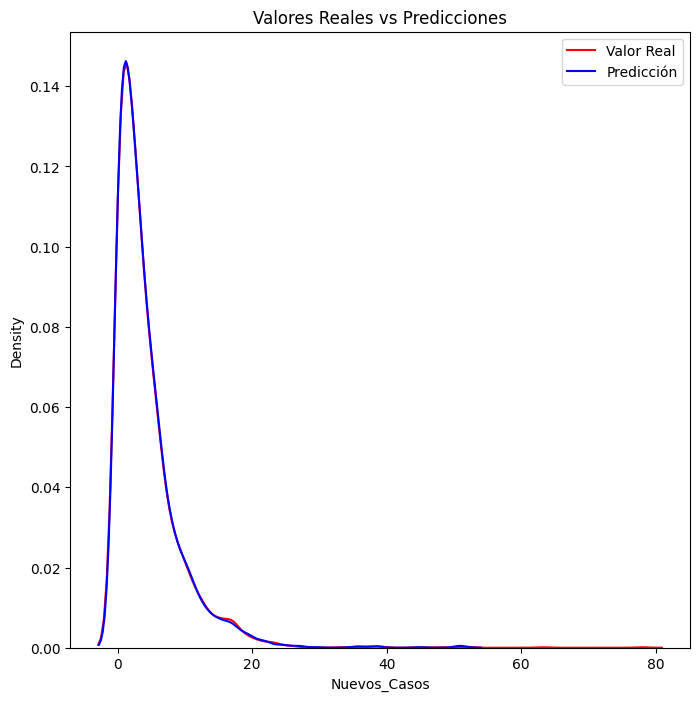

In [20]:
plt.figure(figsize=(8,8))
ax = sns.kdeplot(y_test, color='r', label='Valor Real')
sns.kdeplot(y_pred, color='b', label='Predicción', ax=ax)
plt.title('Valores Reales vs Predicciones')
plt.legend()

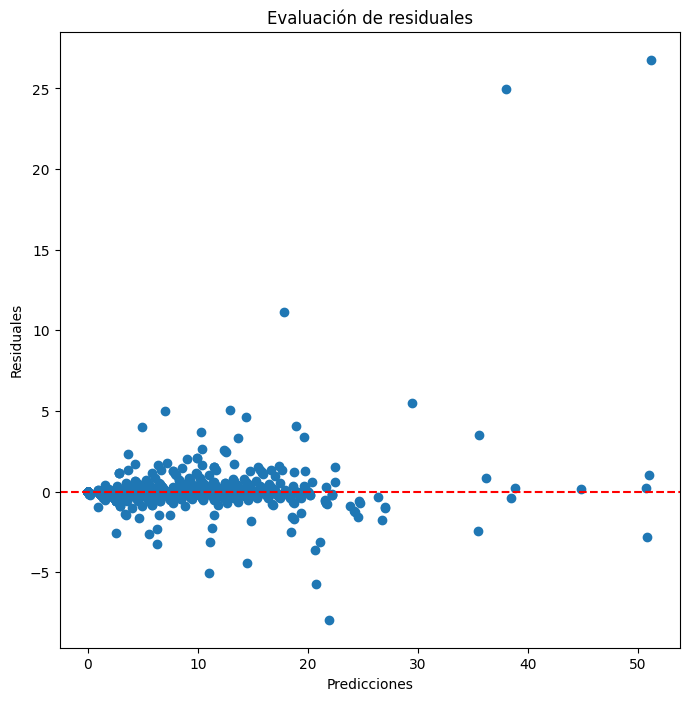

In [21]:
residuals = y_test - y_pred
plt.figure(figsize=(8,8))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Evaluación de residuales')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# XGBOOST

In [22]:
xgb_model = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 200, seed = 42, learning_rate=0.05, gamma=0.001, max_depth=16, n_jobs=-1)
t0 = time.perf_counter()
xgb_model.fit(X_train_w, y_train_w)
t_fit = time.perf_counter() - t0

## Métricas del modelo

In [23]:
y_pred = xgb_model.predict(X_test_w)
# Metricas de evaluación
mae = mean_absolute_error(y_test_w, y_pred)
mse = mean_squared_error(y_test_w, y_pred)
r_squared = r2_score(y_test_w, y_pred)
rmse = np.sqrt(mse)
smape = sMAPE(y_test_w, y_pred)
mase = MASE(y_train_w, y_test_w, y_pred)
y_avg = y_test_w.mean()
relative_error = relative(mae, y_avg)
print("Relative Error Percentage: ", relative_error, " %")
print("Mean Absolute Error (MAE): ", mae)
print("Symetric Mean Absolute Percentage Error (sMAPE): ", smape, " %")
print("Mean Absolute Scaled Error (MASE): ", mase)
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R²): ", r_squared)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Training time: ", t_fit)

Relative Error Percentage:  2.0216213896081823  %
Mean Absolute Error (MAE):  0.0861063003540039
Symetric Mean Absolute Percentage Error (sMAPE):  31.997780366465033  %
Mean Absolute Scaled Error (MASE):  0.018568274136233638
Mean Squared Error (MSE):  0.5191674828529358
R-squared (R²):  0.9791793823242188
Root Mean Squared Error (RMSE):  0.7205327770843848
Training time:  1.849805899997591


## Importancia del modelo

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

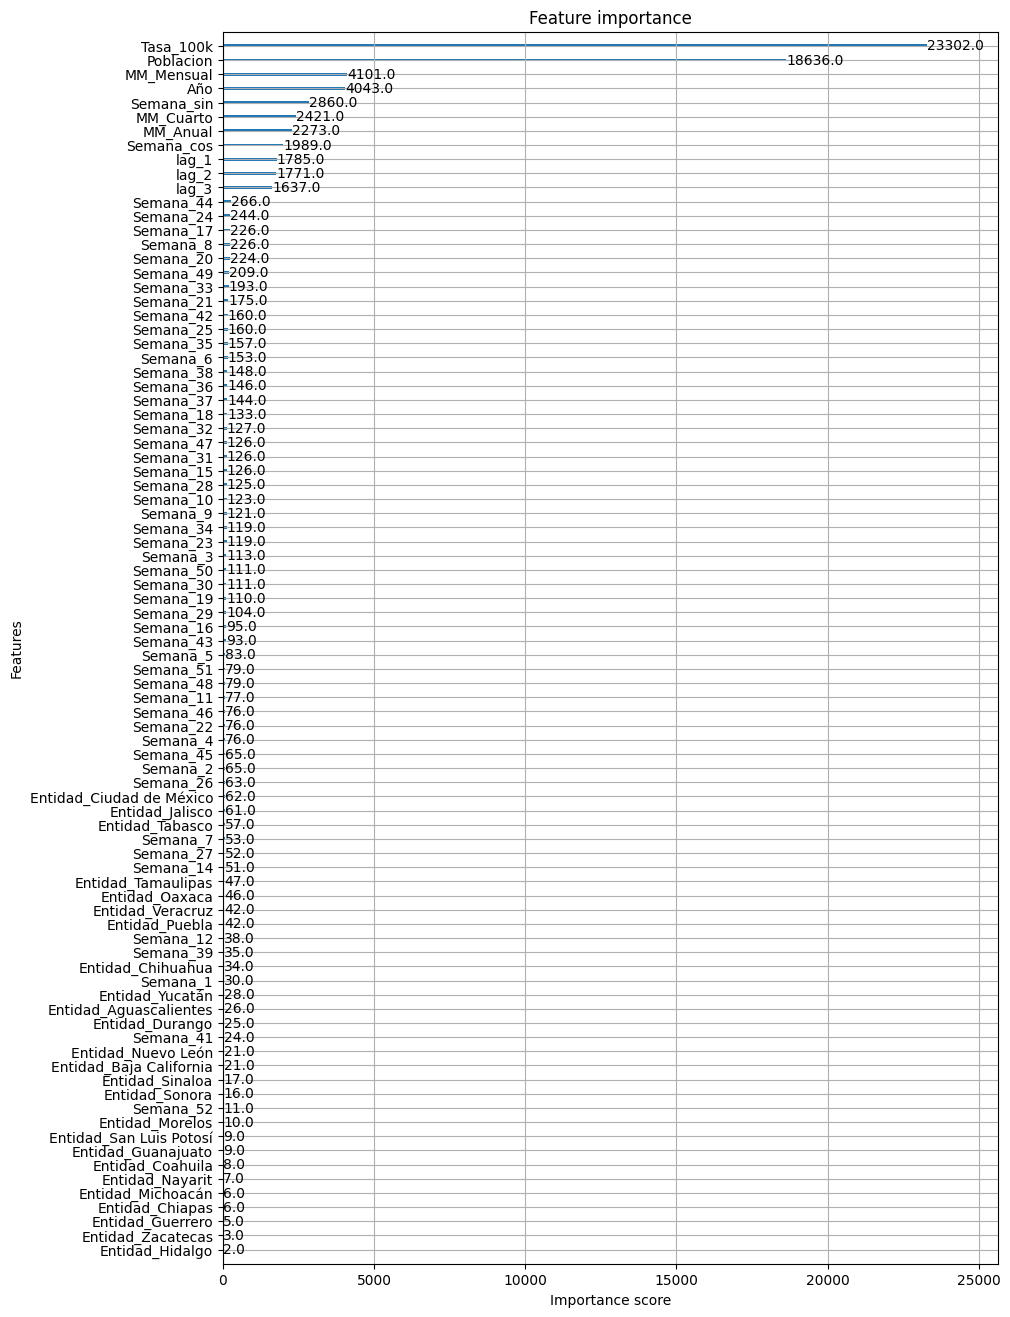

In [24]:
plt.rcParams["figure.figsize"] = (10, 16)
plot_importance(xgb_model, )

## Ajuste del modelo

In [25]:
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train_w, y_train_w, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1,1.0,10))

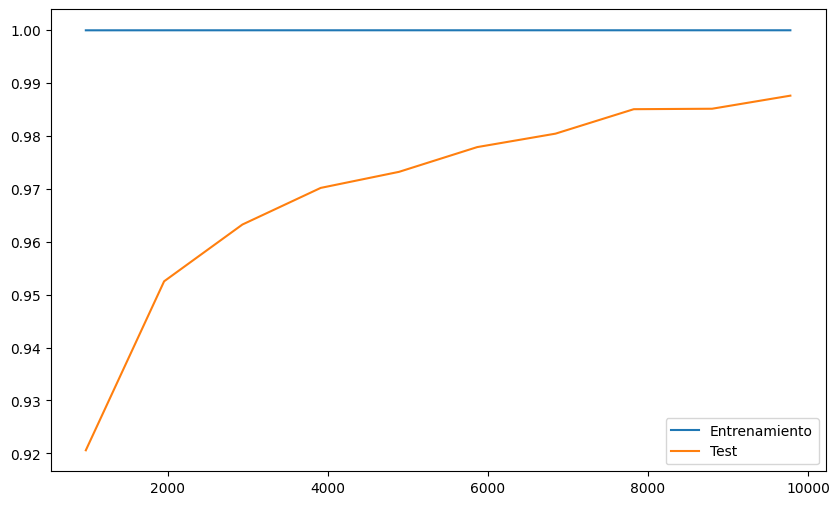

In [26]:
plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Entrenamiento")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test")
plt.legend()
plt.show()

## Comparación de resultados

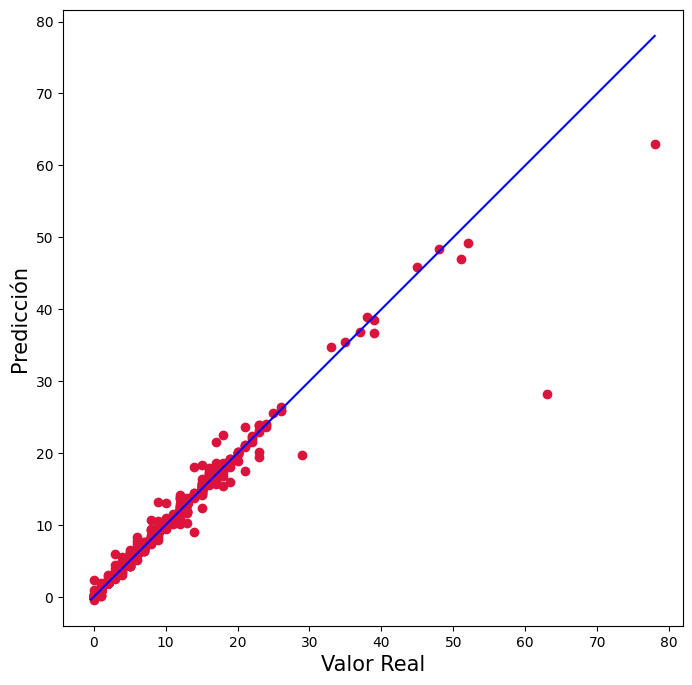

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Valor Real', fontsize=15)
plt.ylabel('Predicción', fontsize=15)
plt.axis('equal')
plt.show()

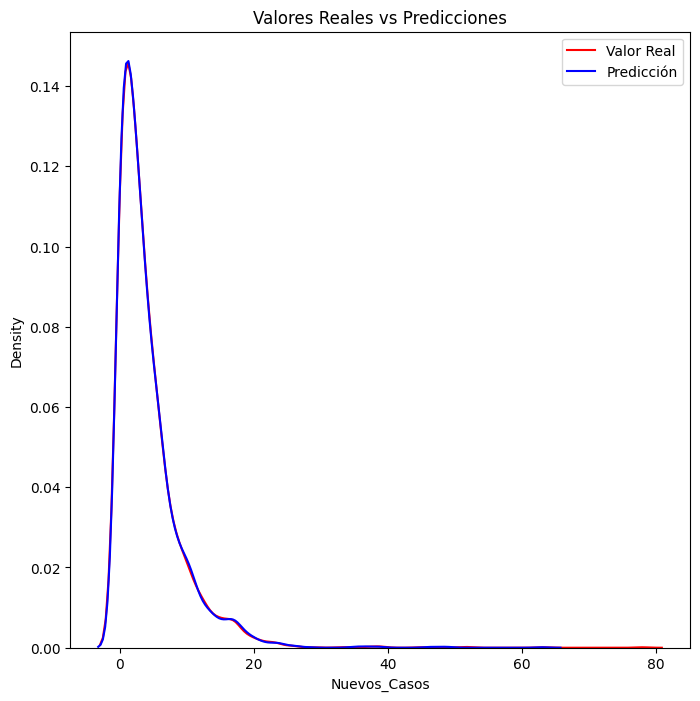

In [28]:
plt.figure(figsize=(8,8))
ax = sns.kdeplot(y_test, color='r', label='Valor Real')
sns.kdeplot(y_pred, color='b', label='Predicción', ax=ax)
plt.title('Valores Reales vs Predicciones')
plt.legend()

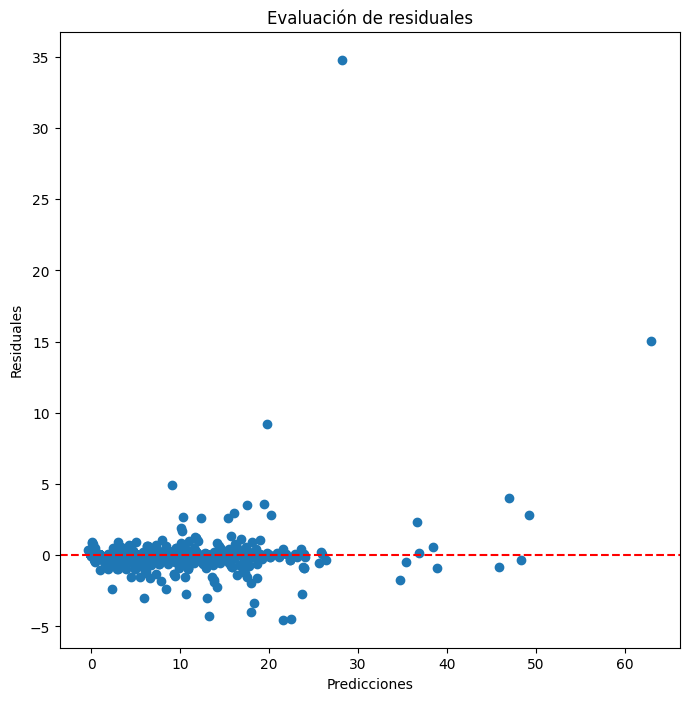

In [29]:
residuals = y_test - y_pred
plt.figure(figsize=(8,8))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Evaluación de residuales')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# LigthGBM

Para este modelo utilizaremos un test de validación, por lo tanto vamos a dividir nuestro set de entrenamiento para tener nuestro set adicional.

In [30]:
# Separamos nuestros datos de entrenamiento y validación
X_train_gbm, X_val, y_train_gbm, y_val = train_test_split(
    X_train_w, y_train_w, test_size=0.20, random_state=42)

In [31]:
train_data = lgb.Dataset(X_train_gbm, label=y_train_gbm)
test_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

In [32]:
params = {
    'objective': 'regression_l1',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'learning_rate': 0.2,
    'feature_fraction': 0.85
}

num_round = 200
t0 = time.perf_counter()
lgbm_model = lgb.train(params, train_data, num_round, valid_sets=[
                test_data], callbacks=[lgb.early_stopping(stopping_rounds=12)])
t_fit = time.perf_counter() - t0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1517
[LightGBM] [Info] Number of data points in the train set: 11734, number of used features: 96
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 3.000000
Training until validation scores don't improve for 12 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's l1: 0.177273


## Métricas del modelo

In [33]:
y_pred = lgbm_model.predict(X_test_w)
# Metricas de evaluación
mae = mean_absolute_error(y_test_w, y_pred)
mse = mean_squared_error(y_test_w, y_pred)
r_squared = r2_score(y_test_w, y_pred)
rmse = np.sqrt(mse)
smape = sMAPE(y_test_w, y_pred)
mase = MASE(y_train_w, y_test_w, y_pred)
y_avg = y_test_w.mean()
relative_error = relative(mae, y_avg)
print("Relative Error Percentage: ", relative_error, " %")
print("Mean Absolute Error (MAE): ", mae)
print("Symetric Mean Absolute Percentage Error (sMAPE): ", smape, " %")
print("Mean Absolute Scaled Error (MASE): ", mase)
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R²): ", r_squared)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Training time: ", t_fit)

Relative Error Percentage:  4.028778974883869  %
Mean Absolute Error (MAE):  0.17159654832227555
Symetric Mean Absolute Percentage Error (sMAPE):  34.13210075343567  %
Mean Absolute Scaled Error (MASE):  0.03700369880530494
Mean Squared Error (MSE):  0.8006315711576879
R-squared (R²):  0.9678915545154301
Root Mean Squared Error (RMSE):  0.8947801803558726
Training time:  1.0861937000008766


## Importancia del modelo

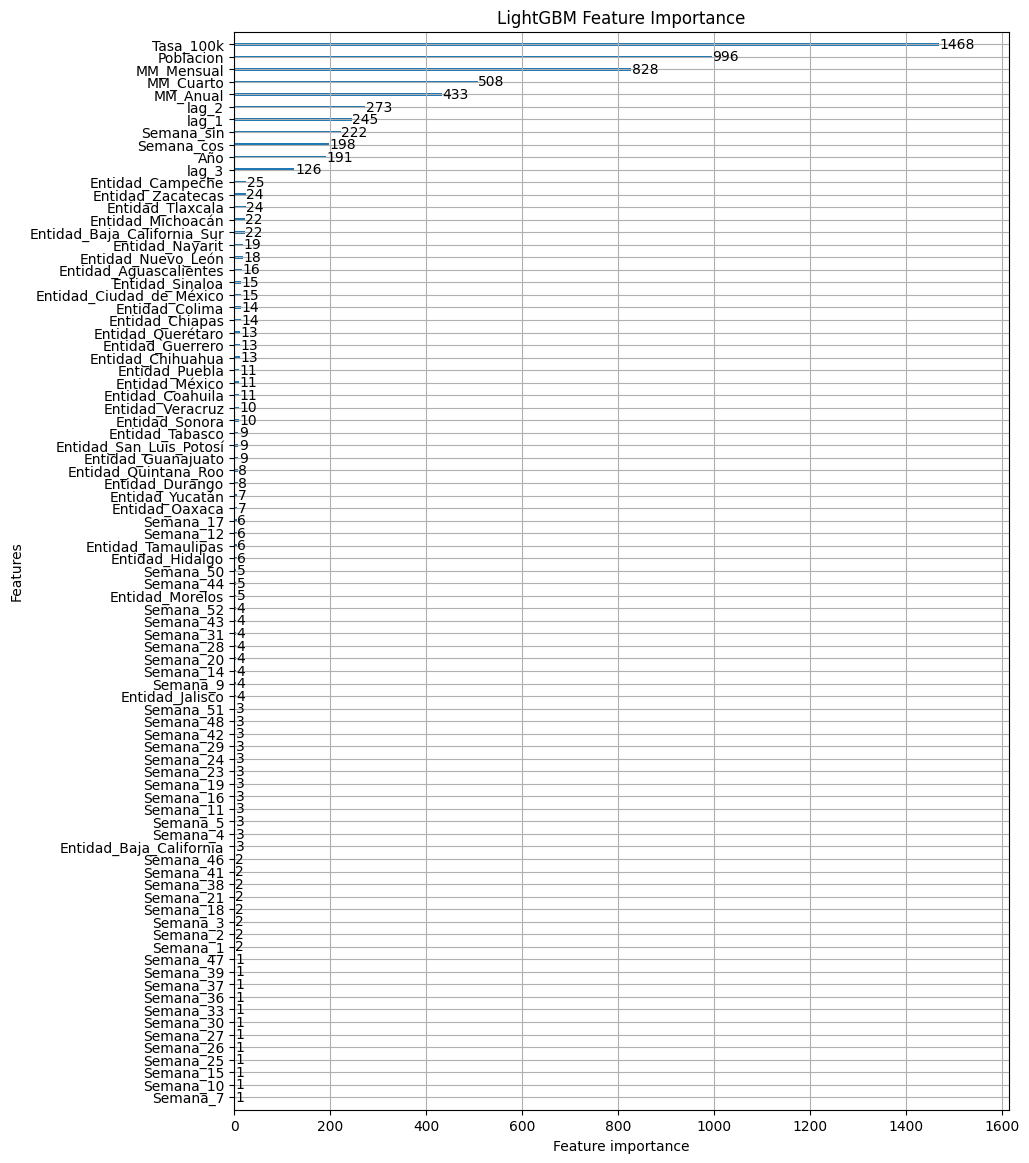

In [34]:
lgb.plot_importance(lgbm_model, importance_type="split", figsize=(10,14), title="LightGBM Feature Importance")
plt.show()

## Comparación de resultados

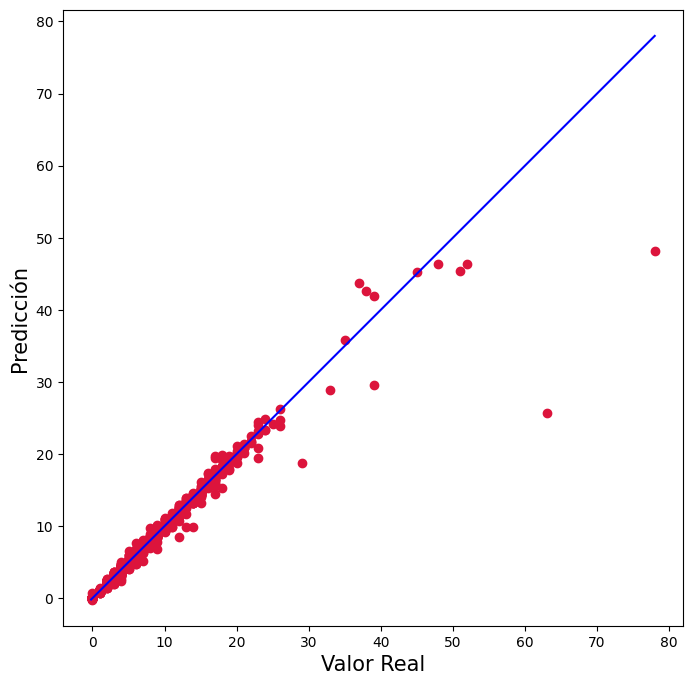

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Valor Real', fontsize=15)
plt.ylabel('Predicción', fontsize=15)
plt.axis('equal')
plt.show()

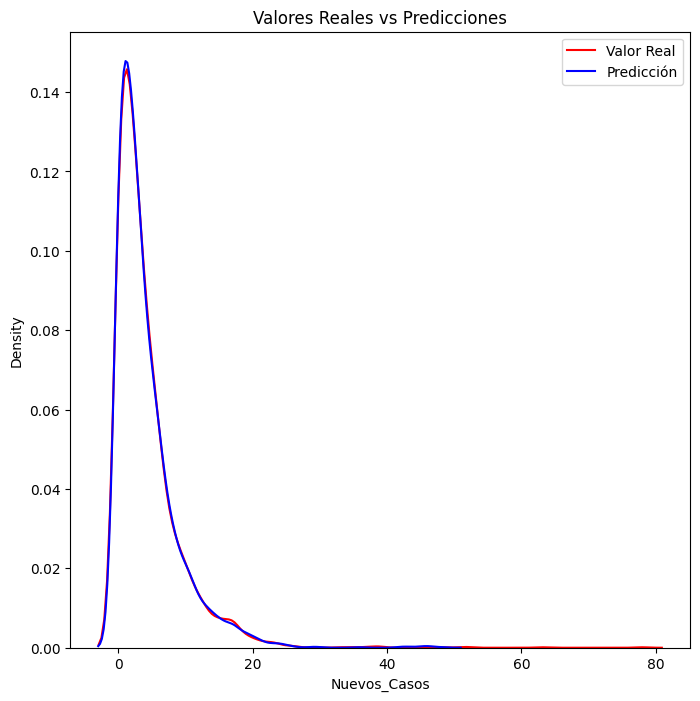

In [36]:
plt.figure(figsize=(8,8))
ax = sns.kdeplot(y_test, color='r', label='Valor Real')
sns.kdeplot(y_pred, color='b', label='Predicción', ax=ax)
plt.title('Valores Reales vs Predicciones')
plt.legend()

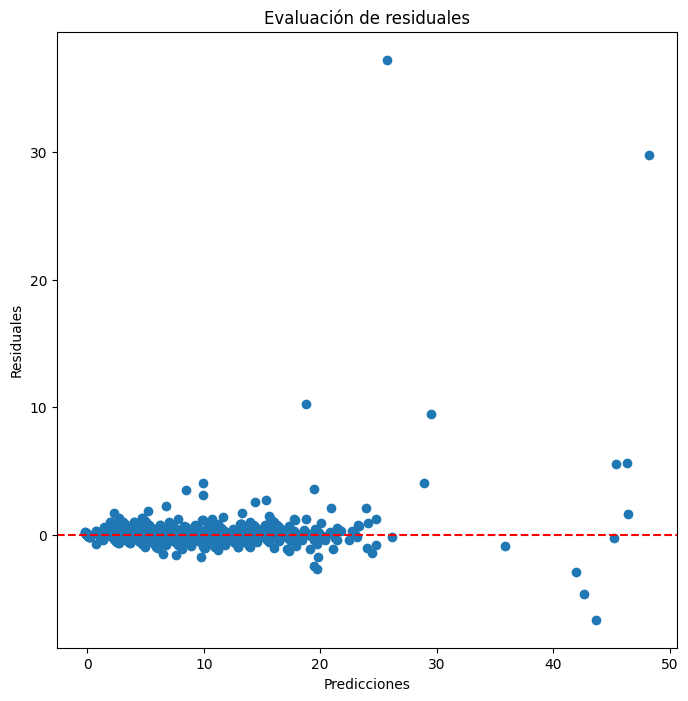

In [37]:
residuals = y_test - y_pred
plt.figure(figsize=(8,8))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Evaluación de residuales')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Hist Gradient Booster

In [38]:
# Entrenamos nuestro modelo de regresión
hgb_model = HistGradientBoostingRegressor(n_iter_no_change=6, learning_rate=0.1, max_iter=200, max_depth=20)
t0 = time.perf_counter()
hgb_model.fit(X_train, y_train)
t_fit = time.perf_counter() - t0

## Métricas del modelo

In [39]:
y_pred = hgb_model.predict(X_test)
# Metricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
smape = sMAPE(y_test, y_pred)
mase = MASE(y_train, y_test, y_pred)
y_avg = y_test.mean()
relative_error = relative(mae, y_avg)
print("Relative Error Percentage: ", relative_error, " %")
print("Mean Absolute Error (MAE): ", mae)
print("Symetric Mean Absolute Percentage Error (sMAPE): ", smape, " %")
print("Mean Absolute Scaled Error (MASE): ", mase)
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R²): ", r_squared)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Training time: ", t_fit)

Relative Error Percentage:  3.8607178218412286  %
Mean Absolute Error (MAE):  0.1644383711303858
Symetric Mean Absolute Percentage Error (sMAPE):  34.03059787972221  %
Mean Absolute Scaled Error (MASE):  0.035460083648744666
Mean Squared Error (MSE):  0.5834947627507749
R-squared (R²):  0.9765995865573662
Root Mean Squared Error (RMSE):  0.7638682888762793
Training time:  3.273562200003653


## Importancia del modelo

In [40]:
importance = permutation_importance(hgb_model, X_train, y_train, n_repeats=10, random_state=42)

In [41]:
importances = importance.importances_std
indices = np.argsort(importances)[::-1]

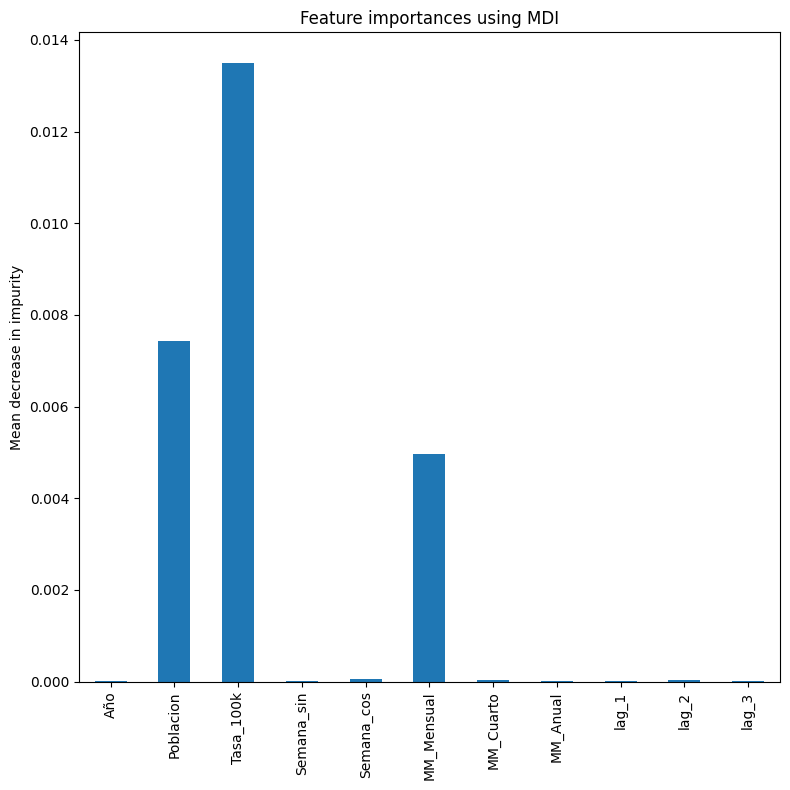

In [42]:
forest_importances = pd.Series(importances, index=list(X.columns))
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Ajuste del modelo

In [43]:
train_sizes, train_scores, test_scores = learning_curve(hgb_model, X_train, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1,1.0,10))

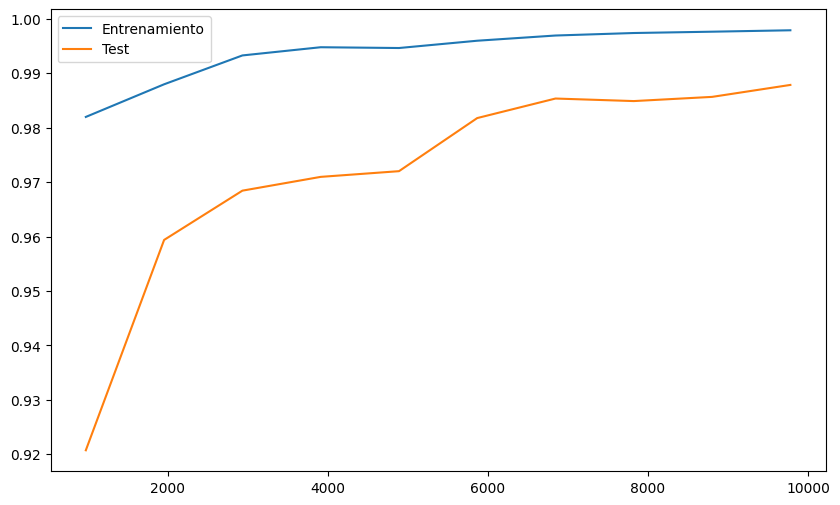

In [44]:
plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Entrenamiento")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test")
plt.legend()
plt.show()

## Comparación de resultados

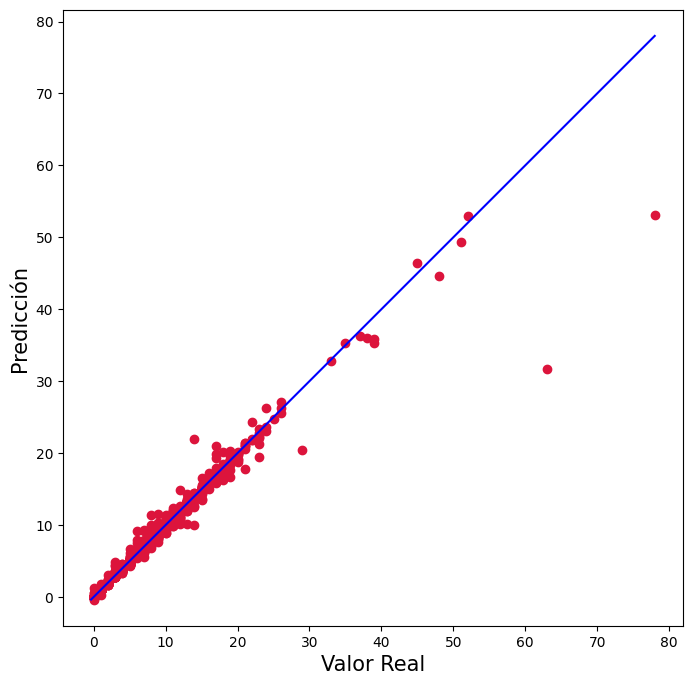

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Valor Real', fontsize=15)
plt.ylabel('Predicción', fontsize=15)
plt.axis('equal')
plt.show()

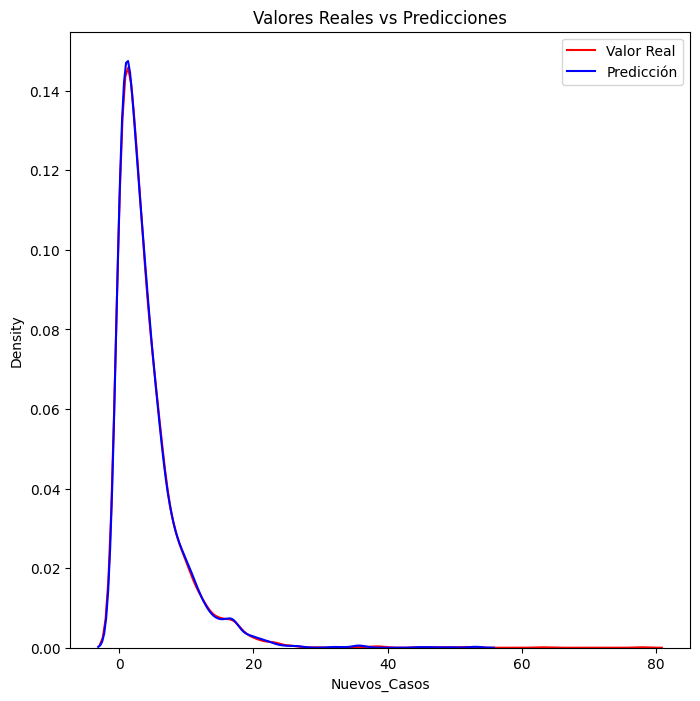

In [46]:
plt.figure(figsize=(8,8))
ax = sns.kdeplot(y_test, color='r', label='Valor Real')
sns.kdeplot(y_pred, color='b', label='Predicción', ax=ax)
plt.title('Valores Reales vs Predicciones')
plt.legend()

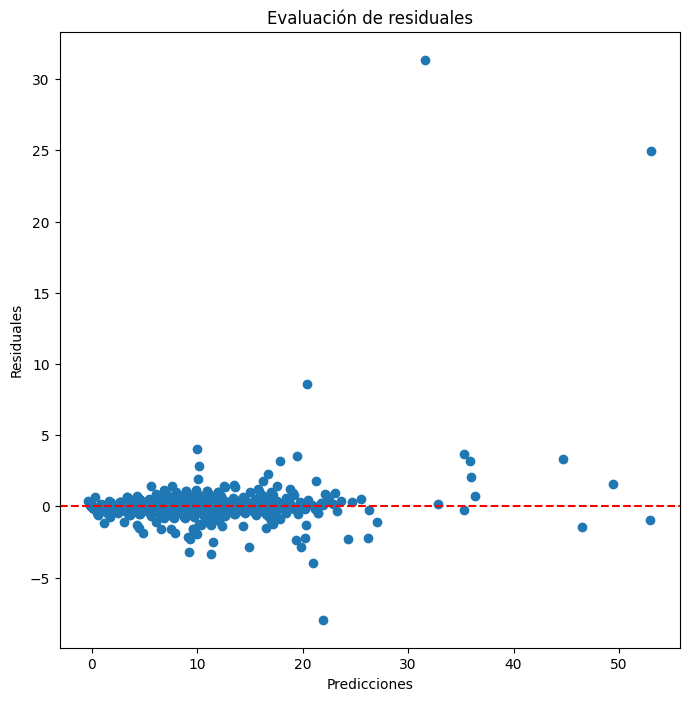

In [47]:
residuals = y_test - y_pred
plt.figure(figsize=(8,8))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Evaluación de residuales')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Elección del mejor modelo

## Comparación de Modelos

Durante el entrenamiento de nuestros modelos se utilizaron distintas métricas, las que se considerarán para analizar nuestros modelos y para ser capaces de comparar directamente estos modelos con los modelos de series de tiempo, serán: Error Relativo y MAE, de manera específica para comparar estos modelos entre sí, se utilizará R² para analizar la explicabilidad de la varianza de los modelos.

### Tabla Comparativa

| Modelo              | MAE       | MASE     | R²       | **Error Relativo** | **Tiempo entrenamiento** |
|---------------------|-----------|----------|----------|--------------------|--------------------------|
| Random Forest       | 0.1224849 | 0.026413 | 0.754129 | 2.87572570325262 % | 1.0256748999963747 s. |
| XGBoost             | 0.0861063 | 0.018568 | 0.979179 | 2.02162138960818 % | 1.849805899997591 s. |
| LightGBM            | 0.1715965 | 0.037003 | 0.967891 | 4.02877897488386 % | 1.0861937000008766 s. |
| Hist Gradient Boost | 0.1644383 | 0.035460 | 0.976599 | 3.86071782184122 % | 3.273562200003653 s. |

Vemos que el modelo de Random Forest tiene una explicabilidad buena, sin embargo es la más baja de todas las presentes, en el caso de Random Forest este modelo no presenta un subentrenamiento ni sobreentrenamiento.

Los modelos LigthGBM y Hist Gradient Boost tienen excelentes explicabilidades, y un eMAE vastante bajo, sin embargo sus errores relativos son los más altos de los modelos,.

## Elección del modelo : XGBoost

El mejor modelo, con lo errores más bajos, la explicabilidad más alta y el error relativo porcentual más bajo, además que su curva de aprendizaje nos muestra que no presenta subentrenamiento ni sobreentrenamiento, es el modelo **XGBBoost**

### Análisis de estadísticas

En las estadísticas de nuestro modelo vemos que su tiempo de entrenamiento es promedio, y es el modelo con un menor error relativo, aún así, los demás modelos presentaron buenos números y la diferencia se basa en poco porcentaje entre ellos, la diferencia más grande se encuentra en el error porcentual y el MAE que es mucho más bajo en el modelo seleccionado.

### Análsis de la Curva de aprendizaje

En la curva de aprendizaje de este modelo, vemos que conforme añadimos más datos tanto en entrenamiento como test nuestros resultados mejoran, notamos que en las etapas iniciales, el modelo en entrenamiento obtiene mucho mejores resultados que en test, esto cambia conforme llegamos al total de datos, donde ambas líneas se acercan una a la otra, sin llegar a tocarse o separarse demasiado, gracias a este gráfico podemos determinar que el modelo no esta subentrenado ni sobreentrenado.

### Análisis de Predicciones vs Valores reales.

En el primer scatter plot donde se comparan los resultado reales vs predicciones, vemos que los valores de nuestras predicciones se aglomeran en la línea de los valores reales, esto nos indica que nuestro modelo tiene un buen rendimiento y que nuestras predicciones no son muy lejanas al valor real, es decir, el error es bajo. También notamos que los punto separados de la linea de valores reales son muy poco y aislados.

En nuestra gráfica de líneas de valores reales vs predicciones, vemos que nuestra curva roja (predicciones) se ajusta muy bien a la linea azul (valores reales), incluso llegando a parecer que se ajustan al 100%, este comportamiento se repite en todas los modelos, denotando que todos nuestros modelos tuvieron resultados y rendimientos buenos, como se mencionó anteriormente, simplemente los del modelo XGBoost fueron un poco mejores.

Finalmente en nuestros gráfica de residuales, buscamos que los residuales se acerquen o aglomeren de manera aleatoria alrededor del 0. Lo que es justo el caso de  nuestra gráfica, los datos se juntan en la línea 0, y no se separan demasiado de esta, demostrando que nuestros errores relativos son muy bajos.